# MMAI 869 2025: Individual Assignment

Version 1: Updated May 2, 2024

<font color='red'>\# TODO: fill in the below</font>

- [Pranit, Sanghavi]
- [20496747]
- [MMAI 2025]
- [A Million Thoughts by Om Swami]
- [June 03, 2024]

# Assignment Instructions

This assignment contains two (2) questions and one (1) optional question for bonus marks. The questions are fully contained in this Google Colab Notebook.

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal.
- Please submit the PDF export of the Notebook.
   - Please name the PDF file `2025_869_FirstnameLastName.pdf`
      - E.g., `2025_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(datetime.datetime.now())

2024-06-07 00:29:25.678016


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.10.12


In [5]:
!echo $PYTHONPATH

/env/python


In [6]:
pip install lightgbm

In [7]:
pip install category_encoders

In [8]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from datetime import datetime
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score

TODO: Delete this text and insert your answer here.

# Question 1: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal components).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, using your findings from the previous steps, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do?


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2022) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question.
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 1.0: Load data and split

In [9]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1)
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [32]:
# Summary of all 5 models in a nutshell (for Question 1):


print("Step 1: Baseline Model Mean F1 Macro Score:", cv_scores_baseline_model.mean())
print("Step 2: Feature Engineered Model Mean F1 Macro Score:", cv_scores_feature_engineering.mean())
print("Step 3: Feature Selection Model F1 Macro Score:", cv_scores_feature_selection.mean())
print("Step 4: Best Hyperparameter Tuned Model F1 Macro Score:", best_score)
print("Step 5: Final Model F1 Macro Score on Testing Data:", f1_macro_test)

Step 1: Baseline Model Mean F1 Macro Score: 0.6307964186921892
Step 2: Feature Engineered Model Mean F1 Macro Score: 0.7616183592506718
Step 3: Feature Selection Model F1 Macro Score: 0.7722474383933069
Step 4: Best Hyperparameter Tuned Model F1 Macro Score: 0.7845508000583956
Step 5: Final Model F1 Macro Score on Testing Data: 0.806316738742801


## 1.1: Baseline model

                   PreviousDefault  NumberPets  PreviousAccounts  \
PreviousDefault           1.000000   -0.010899         -0.001043   
NumberPets               -0.010899    1.000000          0.007695   
PreviousAccounts         -0.001043    0.007695          1.000000   
ResidenceDuration         0.018554   -0.004190         -0.016193   
BadCredit                -0.022351   -0.003243          0.003172   
Amount                    0.001964   -0.019747          0.006333   
Married                   0.005812    0.016874         -0.010150   
Duration                  0.000847   -0.001693         -0.008627   

                   ResidenceDuration  BadCredit    Amount   Married  Duration  
PreviousDefault             0.018554  -0.022351  0.001964  0.005812  0.000847  
NumberPets                 -0.004190  -0.003243 -0.019747  0.016874 -0.001693  
PreviousAccounts           -0.016193   0.003172  0.006333 -0.010150 -0.008627  
ResidenceDuration           1.000000  -0.001307  0.004878  0.013378

<Axes: >

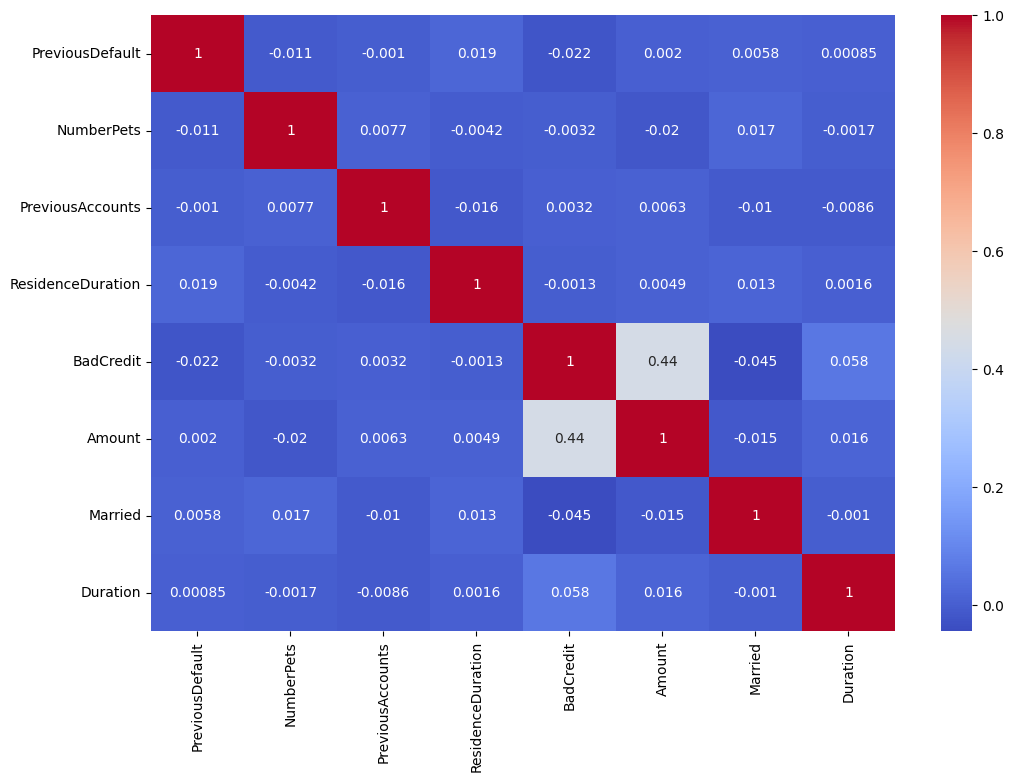

In [11]:
# Creating a dataframe of numerical features to analyze the correlations with the target feature

check_corr = df3.select_dtypes(include=['float64', 'int64'])
correlation_matrix=check_corr.corr()
correlation_matrix['BadCredit'].sort_values(ascending=False)
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [12]:
# Dropping the 'UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate' and 'BadCredit' features from the dataset as they seem to be noise for the model and inisignicant for predictions.

X = df3.drop(columns=['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate', 'BadCredit'])
y = df3['BadCredit']

# Rerunning the default split cell as provided by professor in this assignment so the features dropped in the above step is recorded.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the top 5 rows of the train set
X_train.head()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,1970-04-22
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,1964-06-19
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar,1975-02-17
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,1976-07-27


In [13]:
# Creating lists for the numerical and categorical features

numerical_features = ['Amount', 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Duration']
categorical_features=['Sex', 'Married', 'Purpose', 'City']

# Checking the numerical and categorical features

print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')

Numerical features: ['Amount', 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Duration']
Categorical features: ['Sex', 'Married', 'Purpose', 'City']


In [14]:
# Preprocessing both numerical and categorical data

numerical_transformer=Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('OneHotEncoding', OneHotEncoder())])

categorical_transformer

Pipeline(steps=[('OneHotEncoding', OneHotEncoder())])

In [15]:
# Creating the preprocessor

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Amount', 'NumberPets', 'PreviousAccounts',
                                  'ResidenceDuration', 'Duration']),
                                ('cat',
                                 Pipeline(steps=[('OneHotEncoding',
                                                  OneHotEncoder())]),
                                 ['Sex', 'Married', 'Purpose', 'City'])])

In [16]:
# Defining the baseline model
baseline_model = Pipeline(steps=[('preprocessing', preprocessor), ('LGBM',LGBMClassifier())])

In [17]:
# Cross-validation for the baseline model

cv_scores_baseline_model = cross_val_score(baseline_model, X_train, y_train, cv=5, scoring='f1_macro')

[LightGBM] [Info] Number of positive: 660, number of negative: 3180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 3840, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171875 -> initscore=-1.572397
[LightGBM] [Info] Start training from score -1.572397
[LightGBM] [Info] Number of positive: 659, number of negative: 3181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 3840, number of used features: 37
[LightGBM] [Info] [binary:Bo

In [18]:
# Means of the cross_validation scores

print('Baseline Model Mean F1 Macro Score:', cv_scores_baseline_model.mean())

Baseline Model Mean F1 Macro Score: 0.6307964186921892


## 1.2: Adding feature engineering

In [31]:
# Creating 3 new features - Age, LoanToIncomeRatio, and Family Size

def age(dob):
    today = datetime.today()
    return today.year - pd.to_datetime(dob).year - ((today.month, today.day) < (pd.to_datetime(dob).month, pd.to_datetime(dob).day))

X_train['Age'] = X_train['DateOfBirth'].apply(age)


X_train['LoanToIncomeRatio'] = X_train['Amount'] / (X_train['PreviousAccounts'] + 1)


X_train['Family Size'] = (X_train['Married'] + (X_train['NumberPets'] > 0)).astype(int)


In [20]:
# Updating the list of numerical features with the new features created in the cell above

numerical_features = ['Amount', 'Duration', 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Age', 'LoanToIncomeRatio', 'Family Size']

# Defining the processor so it takes new features into account

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])

# Defining the model pipeline

feature_engineered_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LGBMClassifier())])

# K-fold cross-validation on the training set with the updated model

cv_scores_feature_engineering = cross_val_score(feature_engineered_model, X_train, y_train, cv=5, scoring='f1_macro')


[LightGBM] [Info] Number of positive: 660, number of negative: 3180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 3840, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171875 -> initscore=-1.572397
[LightGBM] [Info] Start training from score -1.572397
[LightGBM] [Info] Number of positive: 659, number of negative: 3181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 3840, number of used features: 40
[LightGBM] [Info] [binary:Bo

In [21]:
print("Feature Engineered Model Mean F1 Macro Score:", cv_scores_feature_engineering.mean())

Feature Engineered Model Mean F1 Macro Score: 0.7616183592506718


## 1.3: Adding feature selection

In [22]:
# Defining the updated preprocessing and selection steps

preprocessor_and_selector = Pipeline(steps=[('preprocessor', preprocessor),('selector', SelectKBest(score_func=f_classif, k=10))])

# Defining the updated model pipeline with feature selection from the step above

selected_feature_model = Pipeline(steps=[('preprocessor_and_selector', preprocessor_and_selector),('classifier', LGBMClassifier())])

# K-fold cross-validation on the training set with the selected features model

cv_scores_feature_selection = cross_val_score(selected_feature_model, X_train, y_train, cv=5, scoring='f1_macro')



[LightGBM] [Info] Number of positive: 660, number of negative: 3180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 3840, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171875 -> initscore=-1.572397
[LightGBM] [Info] Start training from score -1.572397
[LightGBM] [Info] Number of positive: 659, number of negative: 3181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 3840, number of used features: 10
[LightGBM] [Info] [binary:Bo

In [23]:
print("Feature Selection Model F1 Macro Score:", cv_scores_feature_selection.mean())

Feature Selection Model F1 Macro Score: 0.7722474383933069


## 1.4: Adding hyperparameter tuning

In [24]:
# Defining the parameter grid for LGBM

param_grid = {'classifier__num_leaves': [31, 50, 100],'classifier__learning_rate': [0.01, 0.05, 0.1],'classifier__n_estimators': [100, 200, 500]}

# Updated model pipeline for GridSearchCV

grid_search_pipeline = Pipeline(steps=[('preprocessor_and_selector', preprocessor_and_selector),('classifier', LGBMClassifier())])

# Starting GridSearchCV

grid_search = GridSearchCV(grid_search_pipeline, param_grid, cv=5, scoring='f1_macro')

# Fitting GridSearchCV on the training set

grid_search.fit(X_train, y_train)

# Getting the best parameters and best score

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)


[LightGBM] [Info] Number of positive: 660, number of negative: 3180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 3840, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171875 -> initscore=-1.572397
[LightGBM] [Info] Start training from score -1.572397
[LightGBM] [Info] Number of positive: 659, number of negative: 3181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 3840, number of used features: 10
[LightGBM] [Info] [binary:Bo

In [25]:
print("Best Hyperparameter Tuned Model F1 Macro Score:", best_score)

Best Hyperparameter Tuned Model F1 Macro Score: 0.7845508000583956


## 1.5: Performance estimation on testing data

In [26]:
# Adding the new features created in step 3 in the test set

X_test['Age'] = X_test['DateOfBirth'].apply(age)
X_test['LoanToIncomeRatio'] = X_test['Amount'] / (X_test['PreviousAccounts'] + 1)
X_test['Family Size'] = (X_test['Married'] + (X_test['NumberPets'] > 0)).astype(int)

# Defining the final model pipeline with the best parameters

final_model = Pipeline(steps=[('preprocessor_and_selector', preprocessor_and_selector),('classifier', LGBMClassifier(num_leaves=best_params['classifier__num_leaves'],learning_rate=best_params['classifier__learning_rate'],n_estimators=best_params['classifier__n_estimators']))])

# Fitting the final model on the training data

final_model.fit(X_train, y_train)

# Making predictions on the testing set

y_pred = final_model.predict(X_test)

# Calculating the F1 Macro score

f1_macro_test = f1_score(y_test, y_pred, average='macro')


[LightGBM] [Info] Number of positive: 824, number of negative: 3976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171667 -> initscore=-1.573861
[LightGBM] [Info] Start training from score -1.573861


In [27]:
print("Final Model F1 Macro Score on Testing Data:", f1_macro_test)

Final Model F1 Macro Score on Testing Data: 0.806316738742801


# Question 2: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000.

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations.

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



# **Solution:**

**Current Maintenance Costs (without any predictive maintenance):**

Uncle Steve has 700 turbines.
On average, one turbine fails every couple of days.
Therefore, there are approximately 365 / 2 = 182.5 turbine failures per year.
Each failure costs $20,000 to repair.


So, the current annual maintenance cost is:
Current Cost = 182.5 * 20,000 = $3,650,000

**Random Forest Model Confusion Matrix Analysis:**

True Positives (TP) : 201

False Positives (FP) : 50

False Negatives (FN) : 55

True Negatives (TN) : 255,195

**Inspection + Prevention Costs associated with this model:**
Cost (TP) = 201 * (500+2000) = $502,500

Cost (FP) = 50 * 500 =  $25,000

Cost of Failures not predicted:
Cost (FN) = 55 * 20,000 = $1,100,000

**Total Yearly Cost for the Random Forest Model:**
Cost (TP) + Cost (FP) + Cost (FN) = $1,627,500





**Recurring Neural Network Model Confusion Matrix Analysis:**

True Positives (TP) : 226

False Positives (FP) : 1,200

False Negatives (FN) : 30

True Negatives (TN) : 254,045

**Inspection + Prevention Costs associated with this model:**
Cost (TP) = 226 * (500+2000) = $565,000

Cost (FP) = 1200 * 500 =  $600,000

Cost of Failures not predicted:
Cost (FN) = 30 * 20,000 = $600,000

**Total Yearly Cost for the RNN Model:**
Cost (TP) + Cost (FP) + Cost (FN) = $1,765,000

# Both models save money compared to the current maintenance strategy. However, the annual savings by using the Random Forest Model over the Recurring Neural Network Model = Cost Associated with the RNN model - Cost Associated with the Random Forest model = $137,500


# **As the cost associated with the RNN model is higher than the Random Forest Model, it would be muuch cheaper to pick the Random Forest Model **

# Question 3 (Optional/Bonus): Uncle Steve's Diamonds

This question is optional and is worth up to 5 extra credit marks.

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst. Congratulations!

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their bank account).

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.)
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 3.0: Load data

In [28]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 3.1: Clustering Algorithm #1

In [29]:
# TODO: delete this comment and insert code here. Feel free to add more code cells as appropriate.

## 3.2: Clustering Algorithm #2

In [30]:
# TODO: delete this comment and insert code here. Feel free to add more code cells as appropriate.

# 3.3 Model Comparison

TODO: Delete this text and insert your answer here.

## 3.4 Personas

TODO: Delete this text and insert your answer here.